In [71]:
import pandas as pd
df=pd.read_csv(r'C:\Users\moula\Downloads\customer_shopping_behavior.csv')

In [72]:
# to know the overall view wist just tuples(rows &cols) of the dataset
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly


In [73]:
# to know the datatypes of the dataset columns and number of columns available in the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [74]:
# to know the shape of the dataset(3900 rows * 18 columns) present in the dataset
df.shape

(3900, 18)

In [75]:
df.describe() # to check the summary statistics of all the numeric columns

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [76]:
# data cleaning step 
# checking for the missing values or null values
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [19]:
'''from the above dataframe we are getting 37 null values in the review rating column so, i will be going
to fill the missing values/null values with the concept of median here i am using of only median because if i go with mean
it might effect with outliers so avoid that impact i am going with median with each category because we just cannot take median 
from all the categories because from catagory to category median might change. so avoid the bias in the rating for each category
i will take median from each category'''

'from the above dataframe we are getting 37 null values in the review rating column so, i will be going\nto fill the missing values/null values with the concept of median here i am using of only median because if i go with mean\nit might effect with outliers so avoid that impact i am going with median with each category because we just cannot take median \nfrom all the categories because from catagory to category median might change. so avoid the bias in the rating for each category\ni will take median from each category'

In [77]:
df.columns
df['Review Rating']=df.groupby('Category')['Review Rating'].transform(lambda x : x.fillna(x.median()))

In [78]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [79]:
# i m going to convert all the columnd names into the snake case because it will be more redable and error less friendly compare to other types.
# because in sql or python while analysing the data we might end up with errors due to incorrect columns names

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})
df.head(2)

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly


In [80]:
# Creating a new column to categorize the age groups in the form of below labels.
labels=['Young Adult','Adult','Middle-Aged','Senior']
df['age_group']=pd.qcut(df['age'],q=4,labels=labels)
df[['age','age_group']].head(3)

,age,age_group
0,55,Middle-Aged
1,19,Young Adult
2,50,Middle-Aged


In [81]:
# creating a new column purchase_frequency_days 


frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days']=df['frequency_of_purchases'].map(frequency_mapping)
df[['purchase_frequency_days','frequency_of_purchases']].head(2)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly


In [82]:
df[['discount_applied','promo_code_used']].head()

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes


In [83]:
print((df.discount_applied==df.promo_code_used).all())

True


In [90]:
# since these two columns carrying exactly same data i remove the one of the columns because it will create redundancy

df=df.drop('promo_code_used',axis=1)

In [93]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

Text(0.5, 1.0, 'Gender distribution')

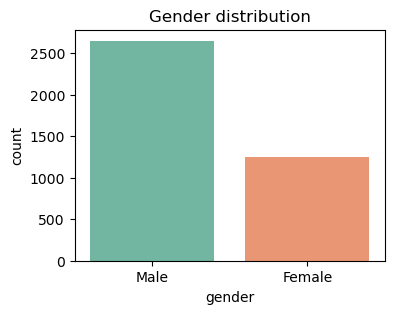

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.countplot(x='gender',data=df,palette='Set2')
plt.title('Gender distribution')

# insight in this data set male customers are more than female customers

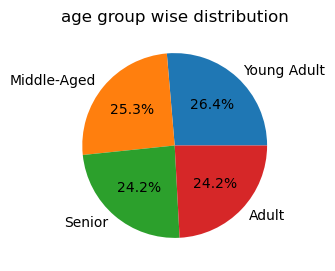

In [106]:
# want to know which age group customers purchasing more in our company

plt.figure(figsize=(4,3))
value=df['age_group'].value_counts(normalize=True)*100
plt.pie(value,labels=value.index,autopct='%1.1f%%')
plt.title('age group wise distribution')
plt.show()

#insight: on an average all age groups are equally purchasing but slightly more purchases are being purchased from young adults
# young adults are more number in purchasing the items in  our company

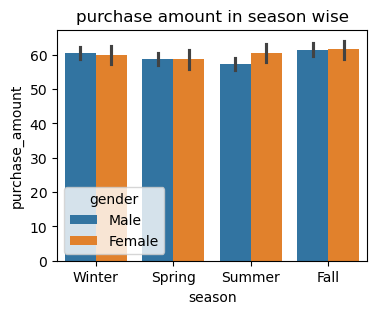

In [108]:
plt.figure(figsize=(4,3))
sns.barplot(x='season',y='purchase_amount',hue='gender',data=df)
plt.title('purchase amount in season wise')
plt.show()
# insight:
# in fall season purchases are more
# in summer and fall seasons females are purchasing more than males

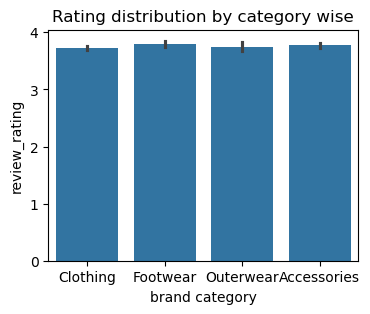

In [111]:
plt.figure(figsize=(4,3))
sns.barplot(x='category',y='review_rating',data=df)
plt.title('Rating distribution by category wise')
plt.xlabel('brand category')
plt.show()

# insight :

# footware brand is more rated by customers by other categories